In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
cirrhosis_data = pd.read_csv("cirrhosis.csv")
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [18]:
data = cirrhosis_data.copy()
data=data.drop(["ID",'Stage'], axis = 1)
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4


<h1> Correlation Between Numerical Features </h1>

In [19]:
numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...
413,681,24472,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9
414,1103,14245,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2
415,1055,20819,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9
416,691,21185,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4


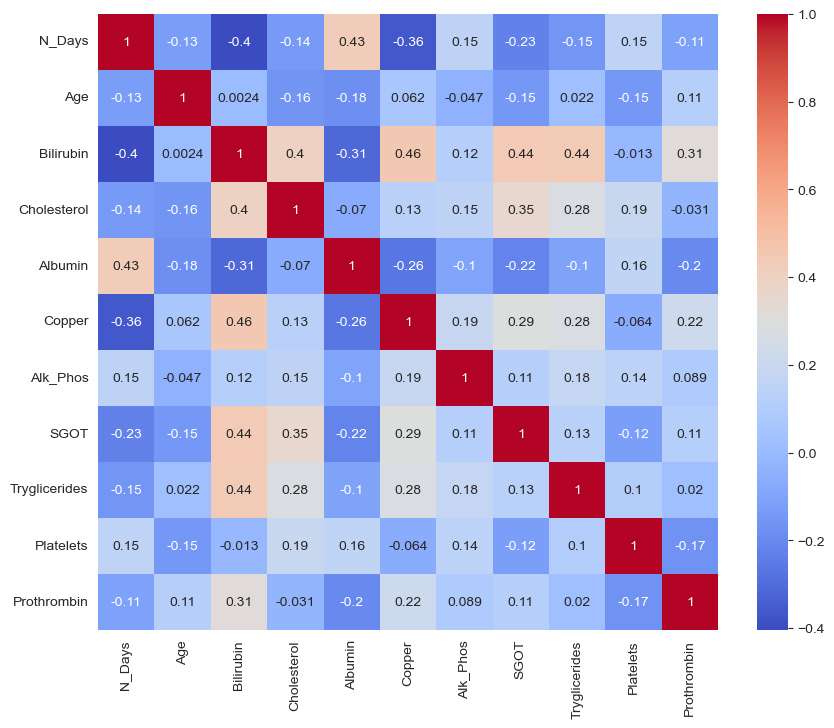

In [20]:
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<h1> Splitting the dataset into training and test data </h1>


In [21]:
from sklearn.model_selection import train_test_split
y = data['Status']
X = data.drop('Status', axis = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(334, 17) (84, 17) (334,) (84,)


<h1> Imputing Missing Values In Numerical Features</h1>

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
def myImputer(df,num = 0):
    
    numData = df.select_dtypes(include = ['int','float'])
    numData_columns = numData.columns
    imputed_numeric_data = pd.DataFrame(imputer.fit_transform(numData))
    if num == 1:
        imputed_numeric_data = pd.DataFrame(imputer.transform(numData))
    imputed_numeric_data.columns = numData_columns
    return imputed_numeric_data

imputed_X_train = myImputer(X_train,0)
imputed_X_test = myImputer(X_test)
imputed_X_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2286.0,20454.0,1.8,232.0,3.64,52.0,559.0,71.30,90.0,141.0,10.0
1,4523.0,19722.0,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6
2,3358.0,17246.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5
3,1067.0,17874.0,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6
4,1680.0,15706.0,0.7,232.0,3.68,52.0,559.0,71.30,90.0,306.0,9.5


<h1> Encoding Categorical variables </h1>

In [23]:
from sklearn.preprocessing import OneHotEncoder
def myEncoder(df,num=0):
    categorical_data = df.select_dtypes(include = 'object')
    categorical_data = categorical_data.fillna('missing')
    df=df.drop(list(categorical_data.columns),axis=1)
    OHEncoder = OneHotEncoder()
    array= OHEncoder.fit_transform(categorical_data).toarray()
    if num == 1:
        array= OHEncoder.transform(categorical_data).toarray()
    array_names = OHEncoder.get_feature_names_out()
    encodedDF= pd.DataFrame(array, columns= array_names)
    return encodedDF

encoded_X_train = myEncoder(X_train,0)
encoded_X_test = myEncoder(X_test)
encoded_X_train

,Drug_D-penicillamine,Drug_Placebo,Drug_missing,Sex_F,Sex_M,Ascites_N,Ascites_Y,Ascites_missing,Hepatomegaly_N,Hepatomegaly_Y,Hepatomegaly_missing,Spiders_N,Spiders_Y,Spiders_missing,Edema_N,Edema_S,Edema_Y
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
330,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
331,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
332,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [24]:
def combine(encoded,imputed):
    encoded_data = pd.concat([encoded,imputed],axis = 1)
    return encoded_data
final_X_train = combine(encoded_X_train, imputed_X_train)
final_X_test = combine(encoded_X_test, imputed_X_test)
final_X_train


,Drug_D-penicillamine,Drug_Placebo,Drug_missing,Sex_F,Sex_M,Ascites_N,Ascites_Y,Ascites_missing,Hepatomegaly_N,Hepatomegaly_Y,...,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,20454.0,1.8,232.0,3.64,52.0,559.0,71.30,90.0,141.0,10.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,19722.0,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,17246.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,17874.0,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,15706.0,0.7,232.0,3.68,52.0,559.0,71.30,90.0,306.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,11868.0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
330,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,22836.0,0.6,212.0,4.03,10.0,648.0,71.30,77.0,316.0,17.1
331,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,18435.0,1.0,321.0,3.50,94.0,955.0,111.00,177.0,289.0,9.7
332,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,19724.0,1.4,232.0,3.82,52.0,559.0,71.30,90.0,249.0,10.3


<h1> Encoding Target Variable for training and test datasets </h1>


In [25]:
from sklearn.preprocessing import LabelEncoder
myLabelEncoder = LabelEncoder()
encoded_y_train = myLabelEncoder.fit_transform(y_train)
encoded_y_test = myLabelEncoder.transform(y_test)
myLabelEncoder.classes_


array(['C', 'CL', 'D'], dtype=object)

<h1> Training Different Models </h1>
<h3> Random Forest Classifier </h3>


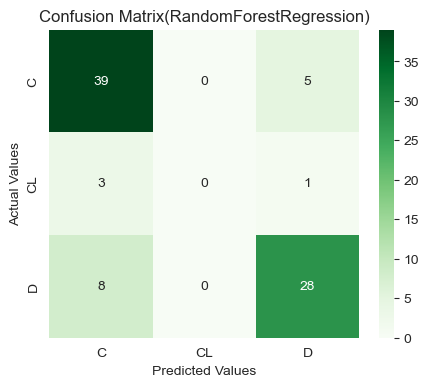

79.76190476190477%


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model = RandomForestClassifier()
model.fit(final_X_train, encoded_y_train)
y_pred = model.predict(final_X_test)
accuracy = accuracy_score(encoded_y_test,y_pred)
conMatrix = confusion_matrix(encoded_y_test,y_pred)
cm_df = pd.DataFrame(conMatrix,
                     index = ['C',"CL",'D'],
                     columns =  ['C',"CL",'D'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix(RandomForestRegression)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(str(accuracy*100) + "%")

<h3> Decision Tree Classifier </h3>

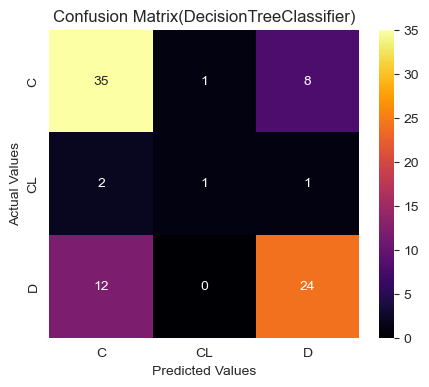

71.42857142857143%


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(final_X_train, encoded_y_train)
y_pred0 = model.predict(final_X_test)
accuracy0 = accuracy_score(encoded_y_test,y_pred0)
conMatrix0 = confusion_matrix(encoded_y_test,y_pred0)
cm_df0 = pd.DataFrame(conMatrix0,
                     index = ['C',"CL",'D'],
                     columns =  ['C',"CL",'D'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df0, annot=True,cmap="inferno")
plt.title('Confusion Matrix(DecisionTreeClassifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(str(accuracy0*100) + '%')

<h3> Logistic Regressor </h3>
We need to transform the dataset for using this model 

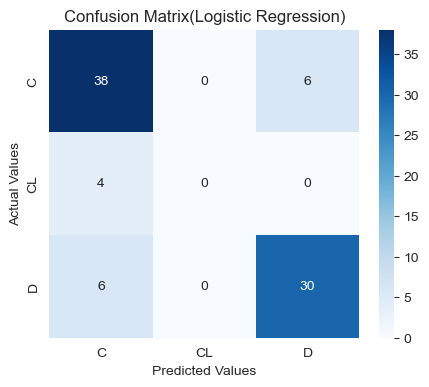

80.95238095238095%


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
final_X_train_columns = final_X_train.columns
myScaler = MinMaxScaler()
normalised_X_train = pd.DataFrame(myScaler.fit_transform(final_X_train))
normalised_X_train.columns = final_X_train_columns


normalised_X_test = pd.DataFrame(myScaler.transform(final_X_test))
normalised_X_test.columns = final_X_train_columns


model1 = LogisticRegression()
model1.fit(normalised_X_train, encoded_y_train)
y_pred1 = model1.predict(normalised_X_test)
accuracy1 = accuracy_score(encoded_y_test, y_pred1)
conMatrix1 = confusion_matrix(encoded_y_test, y_pred1)
cm_df1 = pd.DataFrame(conMatrix1,
                     index = ['C',"CL",'D'],
                     columns =  ['C',"CL",'D'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df1, annot=True,cmap="Blues")
plt.title('Confusion Matrix(Logistic Regression)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(str(accuracy1*100) + '%')

<h3> Support Vector Machine </h3>

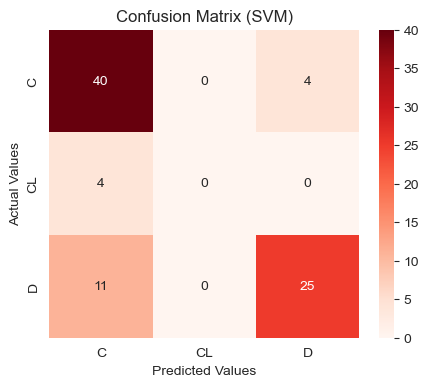

77.38095238095238%


In [29]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(normalised_X_train, encoded_y_train)
y_pred2 = model1.predict(normalised_X_test)
accuracy2 = accuracy_score(encoded_y_test, y_pred2)
conMatrix2 = confusion_matrix(encoded_y_test, y_pred2)
cm_df2= pd.DataFrame(conMatrix2,
                      index = ['C',"CL",'D'],
                      columns = ['C',"CL",'D'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True,cmap="Reds")
plt.title('Confusion Matrix (SVM)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print(str(accuracy2*100) + '%')

<h2> Bar Graph showing the accuracy of different Models </h2>

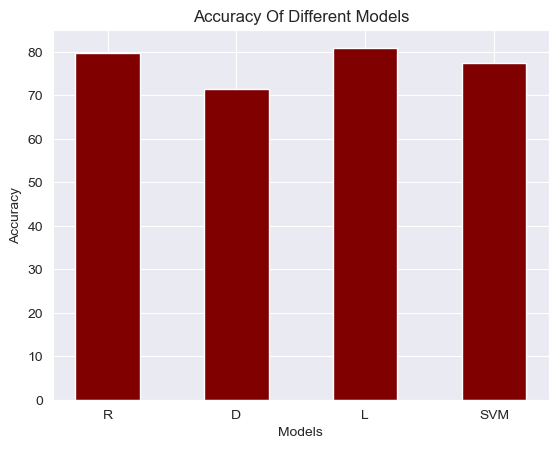

In [30]:
plt.bar(['R',"D","L","SVM"],np.array([accuracy,accuracy0,accuracy1,accuracy2])*100,width = 0.5, color = 'maroon')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Of Different Models")
plt.show()
